# Aula 6 (04/11/2022)
### Nome: Adriel Bombonato Guidini Godinho
### RA: 191011631

## Características Distintivas e Pontos de Interesse 

---

São elementos que permitem a identificação ou caracterização de objetos

> Obs: É importante que sejam invariantes à iluminação, rotação e translação.

## Detecção de linhas

### Transformada de Hough
Computacionalmente caro e nem sempre possue precisão, mas consegue fazer detecção de linhas. Utilização de uma tranformação de espaço para interpretação de parâmetros de linha.

Em cada pixel, é determinados todos os valors de parâmetros que posem ser gerados. Assim, é feito uma votação para cada possibilidade.  

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

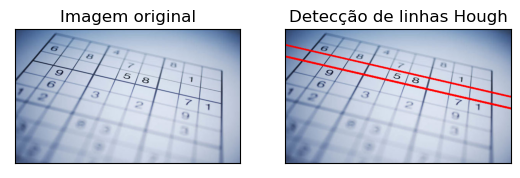

In [69]:
# Carregar imagens
img_sudoku = cv2.imread('images\Sudoku.jpg')
img_sudoku_line = np.copy(img_sudoku)
img_chess = cv2.imread('images\silicon_chess_board.jpg')
img_fotolia = cv2.imread('images\\fotolia.jpg')


gray = cv2.cvtColor(img_sudoku_line,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3) # Criar a detecção de bordas
lines = cv2.HoughLines(edges,1,np.pi/180,200) # Aplicar Hough lines para a detecção de bordas

# Desenhar linhas na imagem original
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_sudoku_line,(x1,y1),(x2,y2),(0,0,255),2)

# Plotar todos os resultados
titles = ['Imagem original', 'Detecção de linhas Hough']
images = [img_sudoku, img_sudoku_line]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Detecção de círculos

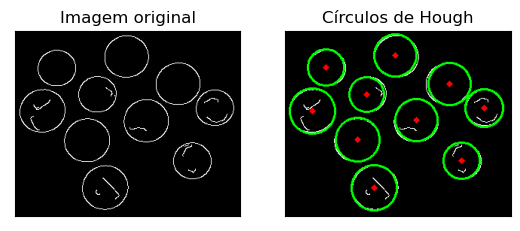

In [56]:
img_circles = cv2.imread('images\circles.png', 0)
img_coins = cv2.imread('images\coins.png', 0)

# Aplicar filtro de madiana e detecção de bordas de Canny
img_coins = cv2.medianBlur(img_coins,5)
img_coins = cv2.Canny(img_coins,100,200)


cimg = cv2.cvtColor(img_coins,cv2.COLOR_GRAY2BGR)

# Criar circulos de Hough
circles = cv2.HoughCircles(img_coins,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # desenhar circulo de fora
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # desenhar circulo central
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

# Plotar todos os resultados
titles = ['Imagem original', 'Círculos de Hough']
images = [img_coins, cimg]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Rotacionar a imagem 

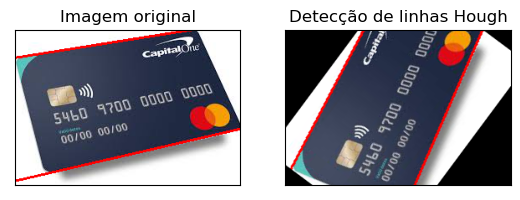

<Figure size 600x600 with 0 Axes>

In [89]:
img_cartao = cv2.imread('images\cartao1.jpg')

gray = cv2.cvtColor(img_cartao,cv2.COLOR_BGR2GRAY)
#gray = cv2.medianBlur(gray,(5))

edges = cv2.Canny(gray,50,150,apertureSize = 3) # Criar a detecção de bordas
lines = cv2.HoughLines(edges,1,np.pi/180,100) # Aplicar Hough lines para a detecção de bordas

# Desenhar linhas na imagem original
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img_cartao,(x1,y1),(x2,y2),(0,0,255),2)


angle = np.arctan(theta)
angle *= 180/np.pi


height, width = img_cartao.shape[:2]
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
rotated_image = cv2.warpAffine(
    src=img_cartao, M=rotate_matrix, dsize=(width, height))

# Plotar todos os resultados
titles = ['Imagem original', 'Detecção de linhas Hough']
images = [img_cartao, rotated_image]
for i in range(2):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.figure(figsize=(6,6))
plt.show()

In [82]:
angle

0.9310813